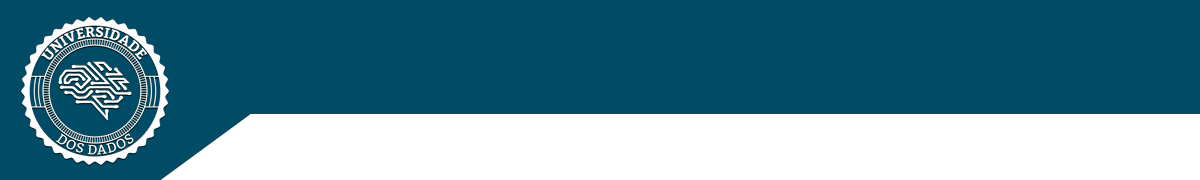
# Universidade dos Dados
GitHub: http://www.github.com/unidados/

Site de dicas: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

Curta a nossa página no Facebook e fique por dentro das atualizações: <a href=http://facebook.com/universidadedosdados>Universidade dos Dados</a>

# Trabalhando com data e tempo no Pandas

In [2]:
import numpy as np
import pandas as pd

In [10]:
file="E:\\Projetos Python\\ufo.csv"
ufo = pd.read_csv(file)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [11]:
# Time é armazenado como string
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

# Podemos utilizar do método str já ensinado para acessar as posições da data

In [12]:
# Porém essa abordagem não é 100% segura

ufo.Time.str.slice(-5, -3).astype(int).head(10)

0    22
1    20
2    14
3    13
4    19
5    15
6     0
7     0
8    17
9     0
Name: Time, dtype: int32

In [13]:
# Vamos converter a coluna Time para o formato Datetime

ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [14]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

# Com uma coluna do tipo Datetime, temos métodos muito melhores

In [15]:
# Selecionando a hora

ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [16]:
#Verificando o dia da semana da data

ufo.Time.dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [17]:
#Verificando o dia do ano da data

ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

# Como funciona a conversão

In [18]:
#O resultado é um timestamp

ts = pd.to_datetime('31/1/1999')
ts

Timestamp('1999-01-31 00:00:00')

In [22]:
# Comparando uma série Datetime com Timestamp

ufo.loc[ufo.Time >= ts, :].head(30)

,City,Colors Reported,Shape Reported,State,Time
12956,Riverton,NaN,FIREBALL,WY,1999-01-31 19:30:00
12957,Lake Charles,NaN,TRIANGLE,LA,1999-01-31 22:02:00
12958,Flagstaff,NaN,CHEVRON,AZ,1999-02-01 00:00:00
12959,Lutz,GREEN,FLASH,FL,1999-02-01 18:00:00
12960,Molalla,NaN,DISK,OR,1999-02-01 18:00:00
12961,Ocala,NaN,TRIANGLE,FL,1999-02-01 21:30:00
12962,Arvada,RED GREEN,FLASH,CO,1999-02-01 22:05:00
12963,Arlington,NaN,FIREBALL,TX,1999-02-02 01:15:00
12964,Mt. Horeb,NaN,OTHER,WI,1999-02-02 02:00:00
12965,Bonner Springs,GREEN,FIREBALL,KS,1999-02-02 04:20:00


In [23]:
#Encontrando a data mais alta

maxima = ufo.Time.max()
maxima

Timestamp('2000-12-31 23:59:00')

In [24]:
#Encontrando a menor data

minima = ufo.Time.min()
minima

Timestamp('1930-06-01 22:00:00')

In [25]:
# Podemos fazer operações matemáticas com as datas

td = maxima - minima
td

Timedelta('25781 days 01:59:00')

In [26]:
# O tipo Timedelta também tem atributos que podem ser acessados
# Aperte o TAB

td.

SyntaxError: invalid syntax (<ipython-input-26-9e46168c4b0d>, line 4)

# Criando um gráfico de aparições de UFO ao longo dos anos

In [27]:
# Utilizando o matplotlib

%matplotlib inline

In [28]:
# Criando a coluna YEAR utilizando os métodos do tipo dt

ufo['Year'] = ufo.Time.dt.year

In [29]:
#Verificando a coluna

ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [30]:
#Contando os valores de aparições de anos

ufo.Year.value_counts().head(20)

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
1996     851
1994     406
1978     326
1975     312
1993     292
1976     281
1974     261
1977     258
1989     247
1992     245
1980     244
1990     237
1979     237
1988     232
1973     227
Name: Year, dtype: int64

In [39]:
ufo["Dia_semana"] = ufo.Time.dt.weekday_name

In [50]:
dia_semana = ufo.groupby('Dia_semana').Dia_semana
dia_semana.head(20)

0         Sunday
1         Monday
2         Sunday
3         Monday
4        Tuesday
5       Saturday
6       Saturday
7      Wednesday
8       Thursday
9        Tuesday
10        Sunday
11      Thursday
12        Friday
13        Friday
14        Sunday
15     Wednesday
16     Wednesday
17        Monday
18     Wednesday
19        Friday
20       Tuesday
21        Sunday
22        Sunday
23        Friday
24      Saturday
25      Saturday
26      Saturday
27        Sunday
28      Thursday
29        Friday
         ...    
117     Saturday
119       Monday
120    Wednesday
121     Saturday
122     Saturday
124     Thursday
125     Thursday
126     Thursday
127    Wednesday
128     Thursday
129     Saturday
130     Thursday
131     Thursday
132     Thursday
140       Monday
141     Saturday
142     Saturday
149     Saturday
150     Saturday
156    Wednesday
158     Saturday
167    Wednesday
168       Monday
211    Wednesday
218    Wednesday
219    Wednesday
225    Wednesday
226    Wednesd

In [44]:
#Observe que os valores não vem ordenados, o que invalída esse tipo de gráfico

ufo.Year.value_counts().sort_index().head(10)

1930    2
1931    2
1933    1
1934    1
1935    1
1936    2
1937    2
1939    3
1941    2
1942    3
Name: Year, dtype: int64

In [45]:
ufo.Year.value_counts().sort_index().tail(10)

1991     220
1992     245
1993     292
1994     406
1995    1344
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
Name: Year, dtype: int64

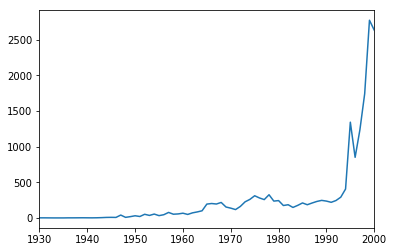

In [46]:
# Plotando o gráfico

ufo.Year.value_counts().sort_index().plot()